In [1]:
%load_ext autoreload
%autoreload 2
import os
import sys
module_path = os.path.abspath(os.path.join('./xclip'))
sys.path.insert(0, module_path)

In [5]:
import xclip
import xclip.models.xclip as xclip
from xclip.utils.logger import create_logger
logger = create_logger('./')
import numpy as np
import torch
from xclip.utils.config import  get_config  
from xclip.models.cct import load
import xclip.datasets.build as build
import cv2
import timm
import open_clip

In [31]:
class Args:
    def __init__(self):
        self.config = './xclip/configs/countix/countix.yaml'
        self.opts = None
        self.auto_resume = False
        self.batch_size=4
        self.pretrained=None
        self.resume=False
        self.accumulation_steps=None
        self.output=None
        self.only_test=False
        self.local_rank=None
args = Args()
config=get_config(args)


=> merge config from ./xclip/configs/countix/countix.yaml


In [401]:

embed_model, _ = load(None, 'ViT-B/16', 
                         device="cpu", jit=False, 
                         T=384, logger=logger
                        )

[2024-11-21 14:50:32 root](cct.py 289): INFO load pretrained CLIP: _IncompatibleKeys(missing_keys=['class_embedding', 'positional_embedding', 'proj', 'conv1.weight', 'ln_pre.weight', 'ln_pre.bias', 'transformer.resblocks.0.message_fc.weight', 'transformer.resblocks.0.message_fc.bias', 'transformer.resblocks.0.message_ln.weight', 'transformer.resblocks.0.message_ln.bias', 'transformer.resblocks.0.message_attn.in_proj_weight', 'transformer.resblocks.0.message_attn.in_proj_bias', 'transformer.resblocks.0.message_attn.out_proj.weight', 'transformer.resblocks.0.message_attn.out_proj.bias', 'transformer.resblocks.0.attn.in_proj_weight', 'transformer.resblocks.0.attn.in_proj_bias', 'transformer.resblocks.0.attn.out_proj.weight', 'transformer.resblocks.0.attn.out_proj.bias', 'transformer.resblocks.0.ln_1.weight', 'transformer.resblocks.0.ln_1.bias', 'transformer.resblocks.0.mlp.c_fc.weight', 'transformer.resblocks.0.mlp.c_fc.bias', 'transformer.resblocks.0.mlp.c_proj.weight', 'transformer.resb

In [403]:
embed_model.state_dict().keys()

odict_keys(['class_embedding', 'positional_embedding', 'proj', 'conv1.weight', 'ln_pre.weight', 'ln_pre.bias', 'transformer.resblocks.0.message_fc.weight', 'transformer.resblocks.0.message_fc.bias', 'transformer.resblocks.0.message_ln.weight', 'transformer.resblocks.0.message_ln.bias', 'transformer.resblocks.0.message_attn.in_proj_weight', 'transformer.resblocks.0.message_attn.in_proj_bias', 'transformer.resblocks.0.message_attn.out_proj.weight', 'transformer.resblocks.0.message_attn.out_proj.bias', 'transformer.resblocks.0.attn.in_proj_weight', 'transformer.resblocks.0.attn.in_proj_bias', 'transformer.resblocks.0.attn.out_proj.weight', 'transformer.resblocks.0.attn.out_proj.bias', 'transformer.resblocks.0.ln_1.weight', 'transformer.resblocks.0.ln_1.bias', 'transformer.resblocks.0.mlp.c_fc.weight', 'transformer.resblocks.0.mlp.c_fc.bias', 'transformer.resblocks.0.mlp.c_proj.weight', 'transformer.resblocks.0.mlp.c_proj.bias', 'transformer.resblocks.0.ln_2.weight', 'transformer.resblocks

In [32]:
train_data,train_loader = build.build_counitxdataloader(config)


In [33]:
for idx, batch_data in enumerate(train_loader):
     print(batch_data.keys())
     images = batch_data["imgs"]
     #b,t,c,h,w = images.size()
     #images = images.reshape(-1,c,h,w)
     print(images.shape)

objc[80432]: Class AVFFrameReceiver is implemented in both /Users/kanantharaman/anaconda3/lib/python3.11/site-packages/av/.dylibs/libavdevice.60.3.100.dylib (0x1445a10f8) and /Users/kanantharaman/anaconda3/lib/python3.11/site-packages/decord/.dylibs/libavdevice.58.5.100.dylib (0x15c7c5010). One of the two will be used. Which one is undefined.
objc[80432]: Class AVFAudioReceiver is implemented in both /Users/kanantharaman/anaconda3/lib/python3.11/site-packages/av/.dylibs/libavdevice.60.3.100.dylib (0x1445a1148) and /Users/kanantharaman/anaconda3/lib/python3.11/site-packages/decord/.dylibs/libavdevice.58.5.100.dylib (0x15c7c5060). One of the two will be used. Which one is undefined.


11/22 20:55:25 - mmengine - WARNING - "FileClient" will be deprecated in future. Please use io functions in https://mmengine.readthedocs.io/en/latest/api/fileio.html#file-io
11/22 20:55:25 - mmengine - WARNING - "HardDiskBackend" is the alias of "LocalBackend" and the former will be deprecated in future.
dict_keys(['imgs', 'label', 'start', 'end', 'count'])
torch.Size([4, 384, 3, 224, 224])


In [53]:
fourcc = cv2.VideoWriter_fourcc(*'mp4v')  # Use MP4V codec
video = cv2.VideoWriter('video.mp4',fourcc, 1, (w,h))
for image in batch_data["imgs"][0]:
    video.write(np.uint8(np.transpose(image.numpy(), (1, 2, 0))))


In [54]:
video.release()

In [286]:
images.size()

torch.Size([1536, 3, 224, 224])

In [40]:
with torch.no_grad():
   x=embed_model(images)

NameError: name 'embed_model' is not defined

In [166]:
x[0]

tensor([[[-2.2765e+00, -1.2453e+00, -1.3994e+00,  ...,  7.8184e-01,
           2.3767e+00,  5.7451e+00],
         [-2.2415e+00, -1.2316e+00, -1.3751e+00,  ...,  7.8824e-01,
           2.4570e+00,  5.7667e+00],
         [-2.2498e+00, -1.2333e+00, -1.3281e+00,  ...,  7.7489e-01,
           2.3990e+00,  5.7160e+00],
         ...,
         [-1.9052e+00, -1.4399e+00, -2.6906e+00,  ...,  1.9424e-01,
           2.7023e+00,  4.7429e+00],
         [-1.8936e+00, -1.4266e+00, -2.7028e+00,  ...,  1.6222e-01,
           2.6784e+00,  4.7573e+00],
         [-1.8743e+00, -1.4172e+00, -2.6789e+00,  ...,  2.1330e-01,
           2.7168e+00,  4.7493e+00]],

        [[-2.0981e+00, -1.5501e+00, -1.4070e+00,  ...,  1.8525e+00,
           2.3132e+00,  5.6870e+00],
         [-2.0845e+00, -1.5436e+00, -1.3920e+00,  ...,  1.8785e+00,
           2.4019e+00,  5.6975e+00],
         [-2.0529e+00, -1.4832e+00, -1.2407e+00,  ...,  1.6547e+00,
           2.4239e+00,  5.5727e+00],
         ...,
         [-1.9533e+00, -1

In [221]:
cls_features = x[0]#.view(b, t, -1)


In [187]:
x[1].mean(2).shape

torch.Size([1, 208, 512])

In [222]:
img_features = x[1]

In [223]:
img_features.shape,cls_features.shape

(torch.Size([4, 384, 512]), torch.Size([4, 384, 512]))

In [90]:
def plot_heatmap(dist: np.ndarray, log_scale: bool = False) -> np.ndarray:
    """Plot the temporal self-similarity matrix into an OpenCV image."""
    np.fill_diagonal(dist, np.nan)
    if log_scale:
        dist = np.log(1 + dist)
    dist = -dist # Invert the distance
    zmin, zmax = np.nanmin(dist), np.nanmax(dist)
    heatmap = (dist - zmin) / (zmax - zmin) # Normalize into [0, 1]
    heatmap = np.nan_to_num(heatmap, nan=1)
    heatmap = np.clip(heatmap * 255, 0, 255).astype(np.uint8)
    heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_VIRIDIS)
    return heatmap

In [76]:
import matplotlib.pyplot as plt


[2024-11-15 21:55:56 matplotlib](__init__.py 305): DEBUG matplotlib data path: /Users/kanantharaman/anaconda3/lib/python3.11/site-packages/matplotlib/mpl-data
[2024-11-15 21:55:56 matplotlib](__init__.py 305): DEBUG CONFIGDIR=/Users/kanantharaman/.matplotlib
[2024-11-15 21:55:56 matplotlib](__init__.py 1479): DEBUG interactive is False
[2024-11-15 21:55:56 matplotlib](__init__.py 1480): DEBUG platform is darwin
[2024-11-15 21:55:56 matplotlib](__init__.py 305): DEBUG CACHEDIR=/Users/kanantharaman/.matplotlib
[2024-11-15 21:55:56 matplotlib.font_manager](font_manager.py 1543): DEBUG Using fontManager instance from /Users/kanantharaman/.matplotlib/fontlist-v330.json


In [124]:
cls_features.shape

torch.Size([1, 208, 512])

In [193]:

for idx in range(img_features.shape[0]):
    dist = torch.cdist(img_features[0], img_features[0], p=2)**2
    heatmap = plot_heatmap(dist.numpy(), log_scale=True)
    cv2.imwrite(f'heatmap_{idx}_{idx}.png', heatmap) 

/var/folders/fn/gqsn1b5x75x3nstgrhp06xtw0000gp/T/ipykernel_2231/3725310736.py:5: RuntimeWarning: invalid value encountered in log
  dist = np.log(1 + dist)


In [130]:
for stride in [1,2,3]:
        # Apply stride
        stride_frames = cls_features[0][::stride]
        stride_frames = stride_frames[:(len(stride_frames) // 64) * 64]
        if len(stride_frames) < 64:
            continue # Skip this stride if there are not enough frames
        stride_frames = stride_frames.unflatten(0, (-1, 64))#torch.stack(stride_frames, axis=0)#.unflatten(0, (-1, 64))#.movedim(1, 2) # Convert to N x C x D x H x W
        #stride_frames = stride_frames.to('cpu')
        print(stride_frames.shape)
        dist = torch.cdist(stride_frames[0], stride_frames[0], p=2)**2
        heatmap = plot_heatmap(dist.numpy(), log_scale=True)
        cv2.imwrite(f'heatmap_{stride}_{stride}.png', heatmap) 

        

torch.Size([3, 64, 512])
torch.Size([1, 64, 512])
torch.Size([1, 64, 512])


/var/folders/fn/gqsn1b5x75x3nstgrhp06xtw0000gp/T/ipykernel_2231/3725310736.py:5: RuntimeWarning: invalid value encountered in log
  dist = np.log(1 + dist)


In [194]:
dist[0]

tensor([    nan,  0.1632,  0.7565,  1.7438,  1.9504,  1.8161,  1.7377,  1.8566,
         1.9492,  1.7738,  1.7761,  2.1161,  2.7009,  3.0806,  2.8743,  3.0161,
         3.3779,  4.2877,  4.7708,  5.5370,  6.2142,  5.8301,  5.9904,  6.2961,
         6.6460,  6.7192,  6.9608,  6.7581,  6.8010,  7.0072,  6.8008,  6.2865,
         5.9488,  5.7946,  5.2332,  3.8308,  3.8713,  3.8520, 14.3538, 25.8715,
        40.6224, 51.5117, 55.7323, 55.4244, 55.3719, 55.4552, 57.2446, 59.0547,
        58.1478, 55.3545, 55.2127, 56.7046, 57.1954, 57.5956, 57.3120, 57.0352,
        57.4644, 57.2699, 57.8301, 57.7430, 58.0325, 57.8942, 57.9166, 58.3951,
        58.5359, 58.4131, 58.6245, 58.4574, 58.4106, 58.4121, 58.1204, 57.8090,
        58.2526, 57.8809, 57.9353, 58.0265, 58.1120, 57.9298, 57.9554, 58.6762,
        58.9409, 59.7615, 59.9681, 58.8786, 57.2173, 55.2582, 55.1056, 57.2741,
        57.5580, 56.6492, 55.2717, 55.2208, 56.1625, 56.3169, 56.3218, 53.2290,
        51.5580, 49.1340, 49.5435, 48.70

In [267]:
dist = torch.cdist(img_features[1],img_features[1], p=2)**2
dist1 = torch.cdist(cls_features[1],cls_features[1], p=2)**2
dist = np.log(1 + dist)
dist1= np.log(1 + dist1)

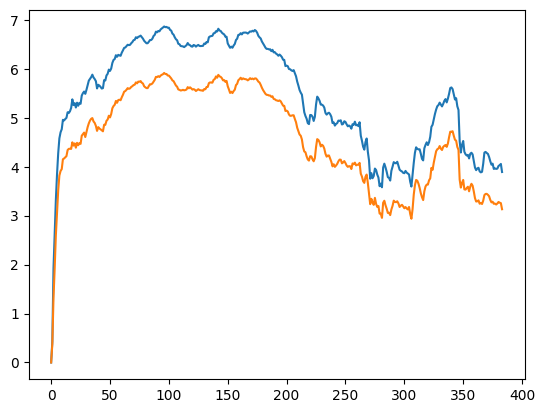

In [268]:

plt.plot(dist[0])
plt.plot(dist1[0])

In [109]:
dist[0,::3]

tensor([     nan,  74.2485, 177.2854, 111.9316, 101.1504, 143.2295, 182.2933,
        158.6210, 197.0994, 196.0265, 144.1377, 179.1146, 141.7727, 422.6034,
        443.6486, 423.5782, 437.3733, 373.1923, 385.3989, 385.5234, 354.0729,
        371.5658, 420.5601, 457.0677, 480.3051, 435.4335, 406.0033, 232.5043,
        299.3757, 364.9122, 423.5060, 355.9371, 385.8215, 292.4618, 324.1901,
        340.3060, 348.9471, 291.9451, 317.7900, 249.3714, 253.9508, 288.0504,
        225.1104, 206.3092, 190.8108, 184.0070, 190.1059, 179.5063, 177.4777,
        103.4275, 177.0527, 188.4703, 166.8807, 146.5547, 216.6829, 254.4276,
        277.3436, 227.4249, 240.0393, 261.8093, 291.8750, 262.4724, 282.4844,
        275.5892, 292.1647, 250.2932, 245.3824, 261.4182, 207.5305,  49.7943,
        906.1564, 906.1564, 906.1564, 906.1564, 906.1564, 906.1564, 906.1564,
        906.1564, 906.1564, 906.1564, 906.1564, 906.1564, 906.1564, 906.1564,
        906.1564, 906.1564, 906.1564, 906.1564, 906.1564, 906.15

In [93]:
import torchvision.transforms as T
VIDEO_PATH = "./xclip/data/Countix/bench press_29.mp4"
transform = T.Compose([
        T.ToPILImage(),
        T.Resize((224, 224)),
        T.ToTensor(),
        T.Normalize(mean=0.5, std=0.5),
    ])
cap = cv2.VideoCapture(VIDEO_PATH)
fps = cap.get(cv2.CAP_PROP_FPS)
raw_frames, frames = [], []
while cap.isOpened():
        ret, frame = cap.read()
        if not ret or frame is None:
            break
        raw_frames.append(frame)
        frame = transform(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
        frames.append(frame)
cap.release()

In [94]:
frames=torch.stack(frames, axis=0)


In [73]:

embed_model, _ = load(None, 'ViT-B/16', 
                         device="cpu", jit=False, 
                         T=len(frames), logger=logger
                        )

[2024-11-15 13:33:17 root](cct.py 172): INFO load pretrained CLIP: _IncompatibleKeys(missing_keys=['class_embedding', 'positional_embedding', 'proj', 'conv1.weight', 'ln_pre.weight', 'ln_pre.bias', 'transformer.resblocks.0.message_fc.weight', 'transformer.resblocks.0.message_fc.bias', 'transformer.resblocks.0.message_ln.weight', 'transformer.resblocks.0.message_ln.bias', 'transformer.resblocks.0.message_attn.in_proj_weight', 'transformer.resblocks.0.message_attn.in_proj_bias', 'transformer.resblocks.0.message_attn.out_proj.weight', 'transformer.resblocks.0.message_attn.out_proj.bias', 'transformer.resblocks.0.attn.in_proj_weight', 'transformer.resblocks.0.attn.in_proj_bias', 'transformer.resblocks.0.attn.out_proj.weight', 'transformer.resblocks.0.attn.out_proj.bias', 'transformer.resblocks.0.ln_1.weight', 'transformer.resblocks.0.ln_1.bias', 'transformer.resblocks.0.mlp.c_fc.weight', 'transformer.resblocks.0.mlp.c_fc.bias', 'transformer.resblocks.0.mlp.c_proj.weight', 'transformer.resb

In [33]:
frames = frames[::3]

In [34]:
frames=frames[:(len(frames) // 64) * 64]

In [97]:
frames.view(1,-1).shape

torch.Size([1, 31309824])

In [41]:
with torch.no_grad():
   x=embed_model(frames)


NameError: name 'embed_model' is not defined

In [75]:
x[0].shape

torch.Size([1, 64, 512])

In [85]:
cls_features = x[0]#.view(1, 64, -1)


In [149]:
cls_features.shape[-1]

512

In [63]:
img_featurs=x[1].mean(dim=1)    

In [62]:
img_featurs.shape, cls_features.shape

(torch.Size([64, 768]), torch.Size([1, 64, 512]))

In [61]:
x[0].shape,x[1].shape

(torch.Size([64, 512]), torch.Size([64, 196, 768]))

In [9]:
x = torch.randn(2, 3, 5)

In [7]:
import torchvision

In [8]:
vit = torchvision.models.vit_b_16(pretrained=True)

/Users/kanantharaman/anaconda3/lib/python3.11/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/Users/kanantharaman/anaconda3/lib/python3.11/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ViT_B_16_Weights.IMAGENET1K_V1`. You can also use `weights=ViT_B_16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [34]:
images = images.view(-1,3, 224, 224)

In [50]:
images[0:].shape

torch.Size([1536, 3, 224, 224])

In [47]:
# a dict to store the activations
activation = {}
def getActivation(name):
    # the hook signature
    def hook(model, input, output):
        activation[name] = output.detach()
    return hook
visual = vit.encoder.register_forward_hook(getActivation('encode'))

In [44]:
with torch.no_grad():
    xvit = vit(images[0:])

In [46]:
visual.remove()

In [48]:
activation

{}

In [52]:
from transformers import ViTModel

In [332]:
model = ViTModel.from_pretrained('google/vit-base-patch16-224')


[2024-11-20 21:49:15 urllib3.connectionpool](connectionpool.py 291): DEBUG Resetting dropped connection: huggingface.co


/Users/kanantharaman/anaconda3/lib/python3.11/site-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


[2024-11-20 21:49:15 urllib3.connectionpool](connectionpool.py 474): DEBUG https://huggingface.co:443 "HEAD /google/vit-base-patch16-224/resolve/main/config.json HTTP/1.1" 200 0
[2024-11-20 21:49:15 urllib3.connectionpool](connectionpool.py 474): DEBUG https://huggingface.co:443 "HEAD /google/vit-base-patch16-224/resolve/main/config.json HTTP/1.1" 200 0


Some weights of ViTModel were not initialized from the model checkpoint at google/vit-base-patch16-224 and are newly initialized: ['vit.pooler.dense.bias', 'vit.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [70]:
with torch.no_grad():
    outputs = model(images)

In [71]:
outputs.shape

torch.Size([1536, 512])

In [72]:
cls = outputs

In [73]:
cls=cls.view(4, 384,-1)

In [48]:
dist = torch.cdist(cls[3],cls[3], p=2)**2
dist = np.log(1 + dist)
plt.plot(dist[0,:-200])


NameError: name 'plt' is not defined

In [91]:

for idx in range(cls.shape[0]):
    dist = torch.cdist(cls[idx], cls[idx], p=2)**2
    heatmap = plot_heatmap(dist.numpy(), log_scale=True)
    cv2.imwrite(f'heatmap_{idx}_{idx}.png', heatmap) 

/var/folders/fn/gqsn1b5x75x3nstgrhp06xtw0000gp/T/ipykernel_63691/3725310736.py:5: RuntimeWarning: invalid value encountered in log
  dist = np.log(1 + dist)


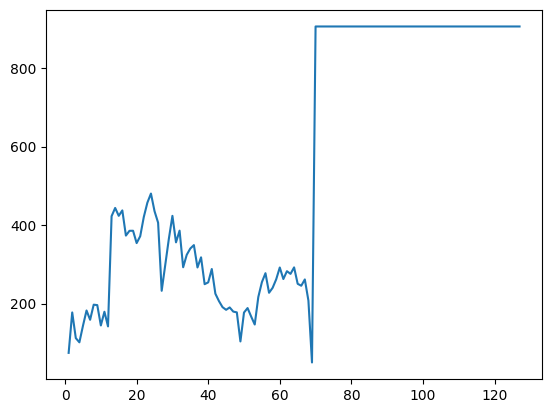

In [111]:
plt.plot(dist[0,::3])

In [30]:
from torchinfo import summary
summary(model, input_size=images.shape)

NameError: name 'images' is not defined

In [129]:
cls[0][0:5,0:5]

tensor([[ 0.0173,  0.6985,  1.1933,  0.2160,  0.8279],
        [ 0.0178,  0.6831,  1.1524,  0.2121,  0.7996],
        [-0.0088,  0.6930,  1.1600,  0.2479,  0.7403],
        [-0.0351,  0.7168,  1.1923,  0.3933,  0.7420],
        [-0.0060,  0.7675,  1.1847,  0.3704,  0.7868]])

In [51]:
from typing import List, Optional
from sklearn.decomposition import PCA

In [52]:
def plot_pca(embeddings: List[np.ndarray]) -> np.ndarray:
    """Plot the 1D PCA of the embeddings into an OpenCV image."""
    projection = PCA(n_components=1).fit_transform(embeddings).flatten()
    projection = (projection - projection.min()) / (projection.max() - projection.min())
    h, w = 200, len(projection) * 4
    img = np.full((h, w, 3), 255, dtype=np.uint8)
    y = ((1 - projection) * h).astype(np.int32)
    x = (np.arange(len(y)) / len(y) * w).astype(np.int32)
    pts = np.stack([x, y], axis=1).reshape((-1, 1, 2))
    img = cv2.polylines(img, [pts], False, (102, 60, 0), 1, cv2.LINE_AA)
    return img


In [170]:
img = plot_pca(x[0][2,:-150].numpy())
img1 = plot_pca(cls[2,:-150].numpy())

In [58]:
cls.shape

torch.Size([4, 384, 512])

In [176]:
for idx in range(cls.shape[0]):
    cv2.imwrite(os.path.join('./', f'pca_{idx}.png'), plot_pca(x[0][idx,:-250].numpy()))   
    cv2.imwrite(os.path.join('./', f'pca1_{idx}.png'), plot_pca(cls[idx,:-250].numpy()))



In [74]:
idx=0
cv2.imwrite(os.path.join('./', f'pca_openclip_{idx}.png'), plot_pca(cls[idx][:115].numpy()))   


True

In [212]:
from transformers import CLIPVisionModel

In [364]:
model1=CLIPVisionModel.from_pretrained('openai/clip-vit-base-patch16',torchscript=True) 

[2024-11-21 13:03:17 urllib3.connectionpool](connectionpool.py 291): DEBUG Resetting dropped connection: huggingface.co


/Users/kanantharaman/anaconda3/lib/python3.11/site-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


[2024-11-21 13:03:18 urllib3.connectionpool](connectionpool.py 474): DEBUG https://huggingface.co:443 "HEAD /openai/clip-vit-base-patch16/resolve/main/config.json HTTP/1.1" 200 0
[2024-11-21 13:03:18 urllib3.connectionpool](connectionpool.py 474): DEBUG https://huggingface.co:443 "HEAD /openai/clip-vit-base-patch16/resolve/main/config.json HTTP/1.1" 200 0


In [365]:
model1.state_dict().keys()

odict_keys(['vision_model.embeddings.class_embedding', 'vision_model.embeddings.patch_embedding.weight', 'vision_model.embeddings.position_embedding.weight', 'vision_model.pre_layrnorm.weight', 'vision_model.pre_layrnorm.bias', 'vision_model.encoder.layers.0.self_attn.k_proj.weight', 'vision_model.encoder.layers.0.self_attn.k_proj.bias', 'vision_model.encoder.layers.0.self_attn.v_proj.weight', 'vision_model.encoder.layers.0.self_attn.v_proj.bias', 'vision_model.encoder.layers.0.self_attn.q_proj.weight', 'vision_model.encoder.layers.0.self_attn.q_proj.bias', 'vision_model.encoder.layers.0.self_attn.out_proj.weight', 'vision_model.encoder.layers.0.self_attn.out_proj.bias', 'vision_model.encoder.layers.0.layer_norm1.weight', 'vision_model.encoder.layers.0.layer_norm1.bias', 'vision_model.encoder.layers.0.mlp.fc1.weight', 'vision_model.encoder.layers.0.mlp.fc1.bias', 'vision_model.encoder.layers.0.mlp.fc2.weight', 'vision_model.encoder.layers.0.mlp.fc2.bias', 'vision_model.encoder.layers.0

In [216]:
with torch.no_grad():
    outputs1 = model1(images)

In [318]:
cls1 = outputs1.last_hidden_state[:,0].view(4, 384,768)

In [362]:
#for idx in range(cls1.shape[0]):
idx=2
cv2.imwrite(os.path.join('./', f'pca_clipvision_{idx}.png'), plot_pca(cls[idx,:-150].numpy())) 


True

In [232]:
len(timm.list_models(pretrained=True))

1457

In [406]:
model4 = timm.create_model('vit_base_patch16_clip_224.openai', pretrained=True)

[2024-11-21 14:54:21 timm.models._builder](_builder.py 196): INFO Loading pretrained weights from Hugging Face hub (timm/vit_base_patch16_clip_224.openai)
[2024-11-21 14:54:21 urllib3.connectionpool](connectionpool.py 291): DEBUG Resetting dropped connection: huggingface.co
[2024-11-21 14:54:22 urllib3.connectionpool](connectionpool.py 474): DEBUG https://huggingface.co:443 "HEAD /timm/vit_base_patch16_clip_224.openai/resolve/main/model.safetensors HTTP/1.1" 404 0
[2024-11-21 14:54:22 urllib3.connectionpool](connectionpool.py 474): DEBUG https://huggingface.co:443 "HEAD /timm/vit_base_patch16_clip_224.openai/resolve/main/pytorch_model.bin HTTP/1.1" 302 0
[2024-11-21 14:54:22 filelock](_api.py 172): DEBUG Attempting to acquire lock 5599694864 on /Users/kanantharaman/.cache/huggingface/hub/.locks/models--timm--vit_base_patch16_clip_224.openai/53b401837e5baa82115d3b6db60c6fff43cfd1a6412e48ed0193d54a69d2f993.lock
[2024-11-21 14:54:22 filelock](_api.py 176): DEBUG Lock 5599694864 acquired o

pytorch_model.bin:   0%|          | 0.00/599M [00:00<?, ?B/s]

[2024-11-21 14:56:22 filelock](_api.py 209): DEBUG Attempting to release lock 5599694864 on /Users/kanantharaman/.cache/huggingface/hub/.locks/models--timm--vit_base_patch16_clip_224.openai/53b401837e5baa82115d3b6db60c6fff43cfd1a6412e48ed0193d54a69d2f993.lock
[2024-11-21 14:56:22 filelock](_api.py 212): DEBUG Lock 5599694864 released on /Users/kanantharaman/.cache/huggingface/hub/.locks/models--timm--vit_base_patch16_clip_224.openai/53b401837e5baa82115d3b6db60c6fff43cfd1a6412e48ed0193d54a69d2f993.lock
[2024-11-21 14:56:22 timm.models._hub](_hub.py 193): DEBUG [timm/vit_base_patch16_clip_224.openai] Safe alternative not found for 'pytorch_model.bin'. Loading weights using default pytorch.


In [407]:
model4.state_dict().keys()

odict_keys(['cls_token', 'pos_embed', 'patch_embed.proj.weight', 'norm_pre.weight', 'norm_pre.bias', 'blocks.0.norm1.weight', 'blocks.0.norm1.bias', 'blocks.0.attn.qkv.weight', 'blocks.0.attn.qkv.bias', 'blocks.0.attn.proj.weight', 'blocks.0.attn.proj.bias', 'blocks.0.norm2.weight', 'blocks.0.norm2.bias', 'blocks.0.mlp.fc1.weight', 'blocks.0.mlp.fc1.bias', 'blocks.0.mlp.fc2.weight', 'blocks.0.mlp.fc2.bias', 'blocks.1.norm1.weight', 'blocks.1.norm1.bias', 'blocks.1.attn.qkv.weight', 'blocks.1.attn.qkv.bias', 'blocks.1.attn.proj.weight', 'blocks.1.attn.proj.bias', 'blocks.1.norm2.weight', 'blocks.1.norm2.bias', 'blocks.1.mlp.fc1.weight', 'blocks.1.mlp.fc1.bias', 'blocks.1.mlp.fc2.weight', 'blocks.1.mlp.fc2.bias', 'blocks.2.norm1.weight', 'blocks.2.norm1.bias', 'blocks.2.attn.qkv.weight', 'blocks.2.attn.qkv.bias', 'blocks.2.attn.proj.weight', 'blocks.2.attn.proj.bias', 'blocks.2.norm2.weight', 'blocks.2.norm2.bias', 'blocks.2.mlp.fc1.weight', 'blocks.2.mlp.fc1.bias', 'blocks.2.mlp.fc2.wei

In [25]:
from xclip.clip.clip import load_vit

In [68]:
model = load_vit(None,'ViT-B-16', device="cpu", jit=False,pretrained='laion400m_e31')

[2024-11-22 21:24:12 root](factory.py 296): INFO Loaded ViT-B-16 model config.
[2024-11-22 21:24:14 urllib3.connectionpool](connectionpool.py 291): DEBUG Resetting dropped connection: huggingface.co
[2024-11-22 21:24:14 urllib3.connectionpool](connectionpool.py 474): DEBUG https://huggingface.co:443 "HEAD /timm/vit_base_patch16_clip_224.laion400m_e31/resolve/main/open_clip_model.safetensors HTTP/1.1" 302 0
[2024-11-22 21:24:14 filelock](_api.py 172): DEBUG Attempting to acquire lock 7412693776 on /Users/kanantharaman/.cache/huggingface/hub/.locks/models--timm--vit_base_patch16_clip_224.laion400m_e31/e94aaa95b532107ed4453989dff56def08fc93f60df77add1e1087a51624559e.lock
[2024-11-22 21:24:14 filelock](_api.py 176): DEBUG Lock 7412693776 acquired on /Users/kanantharaman/.cache/huggingface/hub/.locks/models--timm--vit_base_patch16_clip_224.laion400m_e31/e94aaa95b532107ed4453989dff56def08fc93f60df77add1e1087a51624559e.lock
[2024-11-22 21:24:14 urllib3.connectionpool](connectionpool.py 1021):

open_clip_model.safetensors:   0%|          | 0.00/599M [00:00<?, ?B/s]

[2024-11-22 21:25:24 filelock](_api.py 209): DEBUG Attempting to release lock 7412693776 on /Users/kanantharaman/.cache/huggingface/hub/.locks/models--timm--vit_base_patch16_clip_224.laion400m_e31/e94aaa95b532107ed4453989dff56def08fc93f60df77add1e1087a51624559e.lock
[2024-11-22 21:25:24 filelock](_api.py 212): DEBUG Lock 7412693776 released on /Users/kanantharaman/.cache/huggingface/hub/.locks/models--timm--vit_base_patch16_clip_224.laion400m_e31/e94aaa95b532107ed4453989dff56def08fc93f60df77add1e1087a51624559e.lock
[2024-11-22 21:25:24 root](factory.py 383): INFO Loading pretrained ViT-B-16 weights (laion400m_e31).


In [35]:
summary(model, input_size=images.shape)

Layer (type:depth-idx)                             Output Shape              Param #
CLIPVision                                         [1536, 512]               --
├─VisionTransformer: 1-1                           [1536, 512]               545,280
│    └─Conv2d: 2-1                                 [1536, 768, 14, 14]       589,824
│    └─LayerNorm: 2-2                              [1536, 197, 768]          1,536
│    └─Transformer: 2-3                            [197, 1536, 768]          --
│    │    └─Sequential: 3-1                        [197, 1536, 768]          85,054,464
│    └─LayerNorm: 2-4                              [1536, 768]               1,536
Total params: 86,192,640
Trainable params: 86,192,640
Non-trainable params: 0
Total mult-adds (Units.GIGABYTES): 188.75
Input size (MB): 924.84
Forward/backward pass size (MB): 159884.77
Params size (MB): 229.20
Estimated Total Size (MB): 161038.81

In [69]:
len([k for k in model.state_dict().keys() if k.startswith("visual.") and k.endswith(".attn.in_proj_weight")])

12

In [255]:
cls = outputs.view(4,384,512)

In [256]:
cls.shape

torch.Size([4, 384, 512])

In [271]:
summary(model1, input_size=images.shape)

Layer (type:depth-idx)                                       Output Shape              Param #
CLIPVisionModel                                              [1536, 768]               --
├─CLIPVisionTransformer: 1-1                                 [1536, 768]               --
│    └─CLIPVisionEmbeddings: 2-1                             [1536, 197, 768]          768
│    │    └─Conv2d: 3-1                                      [1536, 768, 14, 14]       589,824
│    │    └─Embedding: 3-2                                   [1, 197, 768]             151,296
│    └─LayerNorm: 2-2                                        [1536, 197, 768]          1,536
│    └─CLIPEncoder: 2-3                                      [1536, 197, 768]          --
│    │    └─ModuleList: 3-3                                  --                        85,054,464
│    └─LayerNorm: 2-4                                        [1536, 768]               1,536
Total params: 85,799,424
Trainable params: 85,799,424
Non-trainable pa

In [39]:
for name, param in model.named_parameters():
    print(name, param.shape)

visual.class_embedding torch.Size([768])
visual.positional_embedding torch.Size([197, 768])
visual.proj torch.Size([768, 512])
visual.conv1.weight torch.Size([768, 3, 16, 16])
visual.ln_pre.weight torch.Size([768])
visual.ln_pre.bias torch.Size([768])
visual.transformer.resblocks.0.attn.in_proj_weight torch.Size([2304, 768])
visual.transformer.resblocks.0.attn.in_proj_bias torch.Size([2304])
visual.transformer.resblocks.0.attn.out_proj.weight torch.Size([768, 768])
visual.transformer.resblocks.0.attn.out_proj.bias torch.Size([768])
visual.transformer.resblocks.0.ln_1.weight torch.Size([768])
visual.transformer.resblocks.0.ln_1.bias torch.Size([768])
visual.transformer.resblocks.0.mlp.c_fc.weight torch.Size([3072, 768])
visual.transformer.resblocks.0.mlp.c_fc.bias torch.Size([3072])
visual.transformer.resblocks.0.mlp.c_proj.weight torch.Size([768, 3072])
visual.transformer.resblocks.0.mlp.c_proj.bias torch.Size([768])
visual.transformer.resblocks.0.ln_2.weight torch.Size([768])
visual.t

In [283]:
images.view(4,3,224,224).shape

torch.Size([1536, 3, 224, 224])

In [290]:
summary(embed_model, input_size=images.shape)

torch.Size([1536, 768, 14, 14])
torch.Size([1536, 768, 196])
torch.Size([1536, 196, 768])
torch.Size([1536, 197, 768])
torch.Size([1536, 197, 768])


Layer (type:depth-idx)                             Output Shape              Param #
CrossFrameCommunicationTransformerv1               [4, 384, 512]             545,280
├─Conv2d: 1-1                                      [1536, 768, 14, 14]       589,824
├─LayerNorm: 1-2                                   [1536, 197, 768]          1,536
├─Transformer: 1-3                                 [197, 1536, 768]          --
│    └─Sequential: 2-1                             [197, 1536, 768]          --
│    │    └─CrossFramelAttentionBlock: 3-1         [197, 1536, 768]          10,042,368
│    │    └─CrossFramelAttentionBlock: 3-2         [197, 1536, 768]          10,042,368
│    │    └─CrossFramelAttentionBlock: 3-3         [197, 1536, 768]          10,042,368
│    │    └─CrossFramelAttentionBlock: 3-4         [197, 1536, 768]          10,042,368
│    │    └─CrossFramelAttentionBlock: 3-5         [197, 1536, 768]          10,042,368
│    │    └─CrossFramelAttentionBlock: 3-6         [197, 1536,

In [294]:
model_date = torch.load("/Users/kanantharaman/.cache/clip/ViT-B-16.pt",map_location=torch.device('cpu'))

In [304]:
for name, param in model_date.named_parameters():
    print(name, param.shape)

positional_embedding torch.Size([77, 512])
text_projection torch.Size([512, 512])
logit_scale torch.Size([])
visual.class_embedding torch.Size([768])
visual.positional_embedding torch.Size([197, 768])
visual.proj torch.Size([768, 512])
visual.conv1.weight torch.Size([768, 3, 16, 16])
visual.ln_pre.weight torch.Size([768])
visual.ln_pre.bias torch.Size([768])
visual.transformer.resblocks.0.attn.in_proj_weight torch.Size([2304, 768])
visual.transformer.resblocks.0.attn.in_proj_bias torch.Size([2304])
visual.transformer.resblocks.0.attn.out_proj.weight torch.Size([768, 768])
visual.transformer.resblocks.0.attn.out_proj.bias torch.Size([768])
visual.transformer.resblocks.0.ln_1.weight torch.Size([768])
visual.transformer.resblocks.0.ln_1.bias torch.Size([768])
visual.transformer.resblocks.0.mlp.c_fc.weight torch.Size([3072, 768])
visual.transformer.resblocks.0.mlp.c_fc.bias torch.Size([3072])
visual.transformer.resblocks.0.mlp.c_proj.weight torch.Size([768, 3072])
visual.transformer.resblo